#Padrões complexos

In [2]:
!wget https://www.dropbox.com/s/0nrix9eknyybuqk/image_2007_000032.jpg?dl=0
!mv image_2007_000032.jpg?dl=0 plane.jpg

--2024-01-16 17:27:49--  https://www.dropbox.com/s/0nrix9eknyybuqk/image_2007_000032.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/0nrix9eknyybuqk/image_2007_000032.jpg [following]
--2024-01-16 17:27:50--  https://www.dropbox.com/s/raw/0nrix9eknyybuqk/image_2007_000032.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce38e10b8e117d275080ad3c5a0.dl.dropboxusercontent.com/cd/0/inline/CLfzgZgCPAMdJ4Lm4eEAdq9-u_cI1e1zau42KQyztuTHLlh33s4qO0xYC2x23fHApUkAVKaN0dubmZJKqCpeiZUmQrkijmjqtKeYFf7jYbzHhX0FHUHkZQkvN4kHLIL6rAU/file# [following]
--2024-01-16 17:27:50--  https://uce38e10b8e117d275080ad3c5a0.dl.dropboxusercontent.com/cd/0/inline/CLfzgZgCPAMdJ4Lm4eEAdq9-u_cI1e1zau42KQyztuTHLlh33s4qO0xYC2x23fHApUkAVKaN0dubmZJKqCpeiZUmQrk

In [4]:
import matplotlib.pyplot as plt
from skimage import io

from scipy.signal import convolve
import numpy as np

%matplotlib inline

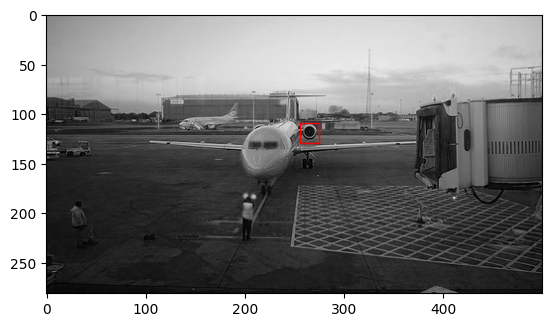

In [7]:
import matplotlib.patches as patches

# Imprime imagem e seleciona retangulo
img = io.imread('plane.jpg')
img = img[:,:,0]
retangulo = [109, 129, 255, 275]


# # Imprime imagem e retangulo
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))


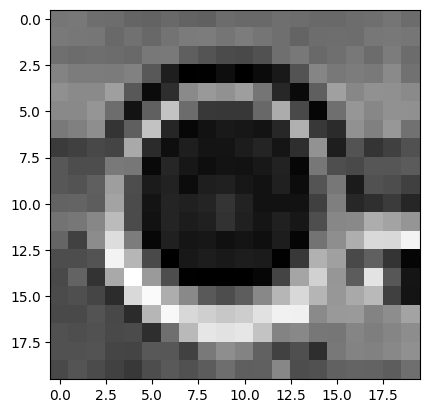

In [10]:
patch= img[retangulo[0]:retangulo[1], retangulo[2]:retangulo[3]]  #Padrão que iremos procurar
patch = patch - patch.mean() # Distribuição controlada
patch=np.flip(patch) #rotacionar a distribuição
plt.imshow(patch, cmap='gray')

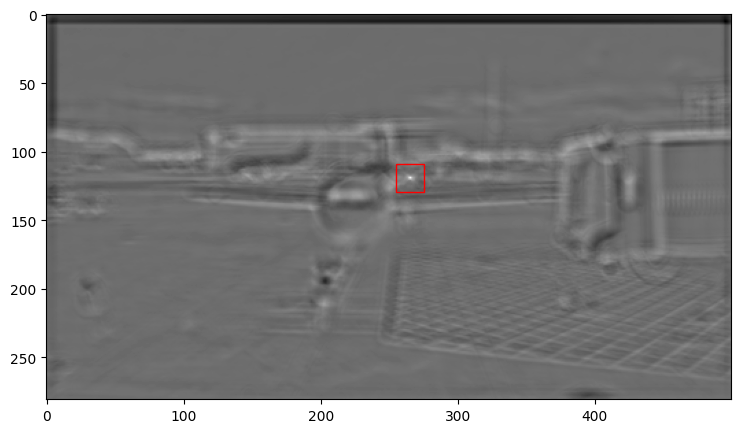

In [14]:
resultado = convolve(img, patch, mode='same')

fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(resultado, cmap='gray')
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))
